# Breast Cancer Data Dive (BCDD)

__A Reason For Concern Among Women:__

Breast cancer is a concerning issue due to:

- High prevalence: It's one of the most common cancers among women globally.
- Mortality rate: Despite advancements in treatment, breast cancer remains a significant cause of death.
- Impact on quality of life: Even if cured, breast cancer can have long-lasting physical and emotional effects.

## Objectives Of the Analysis:

1. __Survival Analysis:__ Investigate the correlation between tumor stage, histology, and patient status (alive/dead) to identify factors influencing survival rates.

2. __Treatment Outcomes:__ Compare the effectiveness of different surgery types (Lumpectomy, Mastectomy, etc.) in terms of patient survival rates.

3. __Investigating cases of More Aggressive Cancer Growths__:Finding the cancer aggressiveness based on ER, PR and HER2 status.Also investigate more aggressiveness cases with Histology and Tumour Stage. Also compare to other Varying aggressiveness cases for aggressiveness.

4. __Investigating Mortality Rates:__ Compare the mortality rates of the patients based on the Stage of Detection. Check which category hass higher chances of survival after surgery.



## Description of the Dataset and the Source:

This dataset consists of a group of breast cancer patients, who had surgery to remove their tumour. The dataset consists of the following variables:

- __Patient_ID:__ unique identifier id of a patient

- __Age:__ age at diagnosis (Years)

- __Gender:__ Male/Female

- __Protein1, Protein2, Protein3, Protein4:__ expression levels (undefined units)

- __Tumour_Stage: I, II, III__

- __Histology:__ Infiltrating Ductal Carcinoma, Infiltrating Lobular Carcinoma, Mucinous Carcinoma

- __ER status:__ Positive/Negative

- __PR status:__ Positive/Negative

- __HER2 status:__ Positive/Negative

- __Surgery_type:__ Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other

- __Date_of_Surgery:__ Date on which surgery was performed (in DD-MON-YY)

- __Date_of_Last_Visit:__ Date of last visit (in DD-MON-YY) [can be null, in case the patient didn’t visited again after the surgery]

- __Patient_Status:__ Alive/Dead [can be null, in case the patient didn’t visited again after the surgery and there is no information available whether the patient is alive or dead].


__Data Source__ : https://www.kaggle.com/datasets/amandam1/breastcancerdataset

## Analysis:

### Loading the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\hi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
df = pd.read_csv('D:/Python Projects/Breast Cancer Data Dive (BCDD)/BRCA.csv')

### Exploring the Dataset

In [4]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
df.tail()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(341, 16)

We can determine the Dataset is not that big and has a lot of Null Values.

In [7]:
#Descriptive Statistics for the Dataset
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [8]:
#Checking for the gender types of the patients
df["Gender"].value_counts()

Gender
FEMALE    330
MALE        4
Name: count, dtype: int64

Since the Dataset has a lot of missing values we cant make any assumptions about it right now.

In [9]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [10]:
df.tail(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
331,TCGA-A1-A0SG,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can actually see that the last 7 rows have no details at all. So we are going to clean them up.

In [11]:
df.dropna(subset="Patient_ID")

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


Lets actually drop them.

In [12]:
df = df.dropna(subset="Patient_ID")

In [13]:
df.tail(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
324,TCGA-AR-A2LQ,59.0,FEMALE,0.150500,1.26740,0.64265,0.261420,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,12-Oct-19,01-Feb-21,Alive
325,TCGA-BH-A0BV,78.0,FEMALE,-0.917230,-0.64693,0.55259,0.458740,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,22-Oct-19,24-Mar-21,Alive
326,TCGA-AO-A1KO,46.0,FEMALE,-0.740140,-0.73755,0.72032,0.721820,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,01-Nov-19,22-Jan-21,Alive
327,TCGA-E2-A1B5,46.0,FEMALE,-0.055036,-0.50643,0.88778,-0.089424,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,22-Oct-19,09-Feb-21,Dead
328,TCGA-AR-A1AL,60.0,FEMALE,0.094585,1.00030,-0.22575,0.048602,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,01-Nov-19,28-Feb-21,Dead
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.244270,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead


We have successfully removed the  last 7 rows of missing data.

In [14]:
df.shape

(334, 16)

In [15]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

Here are some potential explanations for the missing values:

- Successful surgery and no complications: Patients who have a successful surgery without complications might not require frequent follow-up visits, leading to missing "last visit date" and "patient status" values.
- Death: If a patient unfortunately passes away, their medical record might not be updated with a "last visit date" or "patient status" value.
- Lost to follow-up: Patients might have moved, changed their contact information, or simply stopped attending follow-up appointments, resulting in missing data.
- Data entry errors: In some cases, missing values could be due to simple data entry errors or system glitches.

And since the missing values account to a very small part of the dataset we should remove them because it may impact our analysis, as the Dataset is post surgery and fields such as last visit date and patient status is crucial to understand the impact of surgery or treatment.

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

We have successfully cleaned our dataset.

In [18]:
df.shape

(317, 16)

Now let us see how Breast Cancer impacts different genders.

In [19]:
gender_counts = df["Gender"].value_counts()

print(gender_counts)

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64


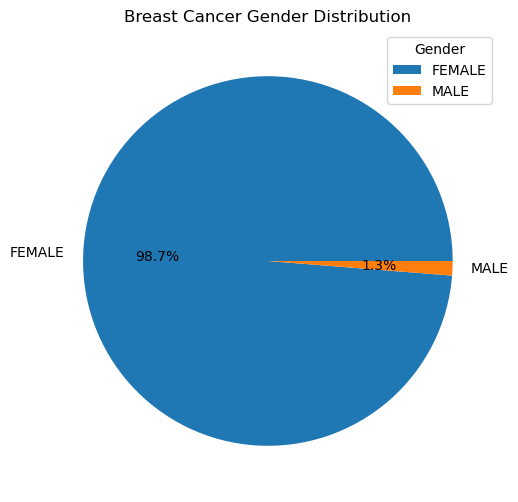

In [20]:
plt.figure(figsize=(18,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Breast Cancer Gender Distribution")
plt.legend(title="Gender",loc='upper right')
plt.show()

We can see in the above chart that the gender distribution comprises of men as well.
Yes, men can be affected by breast cancer. While it's much less common in men than in women, breast cancer is a serious health concern for males as well.

Some key points to remember:

- Rare but serious: Breast cancer in men is a relatively rare occurrence, but it can be just as serious as in women.
- Similar symptoms: The symptoms of breast cancer in men are often similar to those in women, including a lump or thickening in the breast, changes in the nipple, or skin irritation.

### Objective 1 :
Survival Analysis: Investigate the correlation between tumor stage, histology, and patient status (alive/dead) to identify factors influencing survival rates.

__Hypothesis Testing__

1. For relation between Tumour_Stage and Histology
   - Null Hypothesis : There is no significant association between the two.
   - Alternate hypothesis : There is association between the two.

2. For relation between Tumour_Stage and Patient_Status
   - Null Hypothesis : There is no significant association between the two.
   - Alternate hypothesis : There is association between the two.

In [21]:
from scipy.stats import chi2_contingency

In [22]:
contingency_table = pd.crosstab(df['Tumour_Stage'], df['Histology'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 7.283782899383098
P-value: 0.12163025577058541


<Axes: xlabel='Histology', ylabel='Tumour_Stage'>

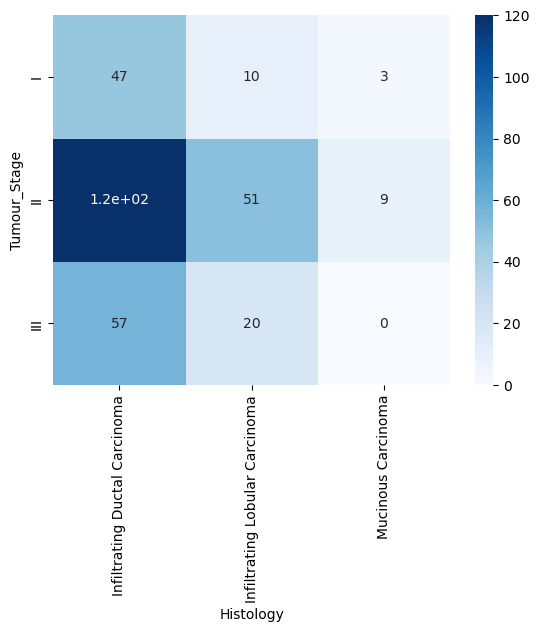

In [23]:
sns.heatmap(contingency_table, annot=True, cmap='Blues')

Interpretation of Chi-Square Test and Heatmap:

Chi-Square Test:

- Statistic: 7.28378
- P-value: 0.12163

Conclusion:

At a typical significance level of 0.05, since the p-value (0.12163) is greater than 0.05, we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude a significant association between Tumor Stage and Histology.

In [24]:
contingency_table_2 = pd.crosstab(df['Tumour_Stage'], df['Patient_Status'])
chi2, p_value, _, _ = chi2_contingency(contingency_table_2)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 1.1254246038591387
P-value: 0.5696618715775454


<Axes: xlabel='Patient_Status', ylabel='Tumour_Stage'>

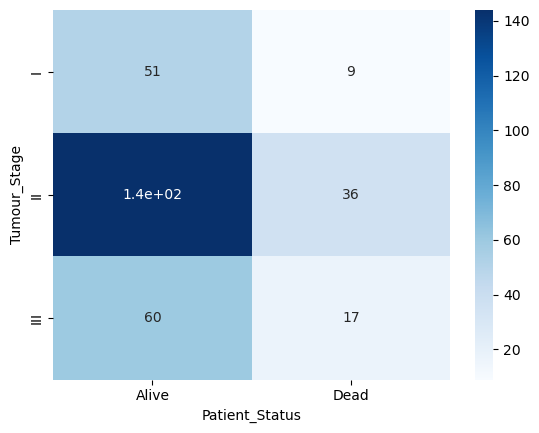

In [25]:
sns.heatmap(contingency_table_2, annot=True, cmap='Blues')

Interpretation of Chi-Square Test and Heatmap:

Chi-Square Test:

- Statistic: 1.12542
- P-value: 0.56966

Conclusion:

At a typical significance level of 0.05, since the p-value (0.56966) is greater than 0.05, we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude a significant association between Tumor Stage and Patient Status.

### Objective 2:
Treatment Outcomes: Compare the effectiveness of different surgery types (Lumpectomy, Mastectomy, etc.) in terms of patient survival rates and recurrence.

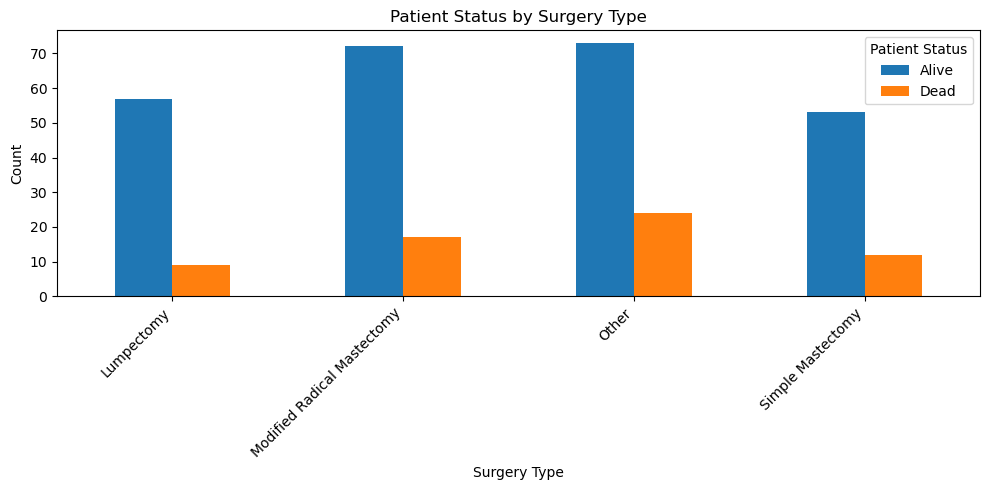

In [26]:
# Group by surgery type and patient status
grouped_data = df.groupby(["Surgery_type", "Patient_Status"])["Patient_Status"].size().unstack(fill_value=0)

# Plot the bar chart
grouped_data.plot(kind="bar", figsize=(10, 5))
plt.title("Patient Status by Surgery Type")
plt.xlabel("Surgery Type")
plt.ylabel("Count")
plt.legend(title="Patient Status")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [27]:
grouped_data

Patient_Status,Alive,Dead
Surgery_type,,
Lumpectomy,57,9
Modified Radical Mastectomy,72,17
Other,73,24
Simple Mastectomy,53,12


In [28]:
survival_rates = df.groupby('Surgery_type')['Patient_Status'].value_counts().unstack()
survival_rates['Survival Rate'] = (survival_rates['Alive']/(survival_rates['Alive']+survival_rates['Dead']))*100

survival_rates

Patient_Status,Alive,Dead,Survival Rate
Surgery_type,,,
Lumpectomy,57,9,86.363636
Modified Radical Mastectomy,72,17,80.898876
Other,73,24,75.257732
Simple Mastectomy,53,12,81.538462


Key Observations:

- Lumpectomy: Has the highest overall number of patients, with a relatively high proportion of survivors.
- Modified Radical Mastectomy: Has a lower overall number of patients compared to Lumpectomy and Simple Mastectomy. The survival rate seems to be lower than Lumpectomy but higher than Others and slightly lower than Simple Mastectomy.
- Other: Has the lowest overall number of patients. The survival rate appears to be similar to Modified Radical Mastectomy.
- Simple Mastectomy: Has a relatively high proportion of deaths compared to the other surgery types.

Potential Insights:

- Lumpectomy might be a more effective surgery type in terms of overall survival.
- Modified Radical Mastectomy and Other might have similar survival rates.
- Simple Mastectomy appears to have the highest mortality rate among the options.

## Objective 3:
__Investigating cases of More Aggressive Cancer Growths__:Finding the cancer aggressiveness based on ER, PR and HER2 status. Also investigate more aggressiveness cases with Histology and Tumour Stage. Also compare to other Varying aggressiveness cases for aggressiveness.

__Extracting a New variable, "Aggressiveness"__

The terms "ER status" and "PR status" refer to the presence or absence of estrogen receptors (ER) and progesterone receptors (PR) on breast cancer cells. These receptors are proteins that can bind to estrogen and progesterone hormones, respectively.

ER status:

- ER-positive: If breast cancer cells have ER, they are considered ER-positive. These cells are stimulated to grow by estrogen.
- ER-negative: If breast cancer cells do not have ER, they are considered ER-negative. These cells are not affected by estrogen.

PR status:

- PR-positive: If breast cancer cells have PR, they are considered PR-positive. These cells are stimulated to grow by progesterone.
- PR-negative: If breast cancer cells do not have PR, they are considered PR-negative. These cells are not affected by progesterone.

Impact on cancer growth:

- ER-positive and PR-positive breast cancers: These types of cancers are often less aggressive and tend to grow more slowly. They are also more likely to respond to hormone therapy, which blocks the effects of estrogen and progesterone.
- ER-negative and PR-negative breast cancers: These types of cancers are often more aggressive and tend to grow more rapidly. They are less likely to respond to hormone therapy.
- ER-positive or PR-positive breast cancers: These types of cancers may have varying levels of aggressiveness.

HER2 is another important factor to consider when assessing the aggressiveness of breast cancer. It refers to the presence of human epidermal growth factor receptor 2 on breast cancer cells.

How HER2 Status Impacts Cancer Aggressiveness:

- HER2-positive breast cancer: This type is often more aggressive, grows faster, and is more likely to spread to other parts of the body. It can also be more resistant to certain treatments.
- HER2-negative breast cancer: This type is generally less aggressive and has a better prognosis compared to HER2-positive breast cancer.

In [29]:
def classify_aggressiveness(er_status, pr_status,her2_status):
  if er_status == 'Positive' and pr_status == 'Positive' and her2_status == 'Positive':
    return 'More Aggressive'
  elif er_status == 'Negative' and pr_status == 'Negative' and her2_status == 'Negative':
    return 'Less Aggressive'
  else:
    return 'Varying Aggressive'

df['Aggressiveness'] = df.apply(lambda row: classify_aggressiveness(row['ER status'], row['PR status'], row['HER2 status']), axis=1)

In [30]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Aggressiveness
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive,Varying Aggressive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead,Varying Aggressive
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive,Varying Aggressive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive,Varying Aggressive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead,Varying Aggressive


In [31]:
df["Aggressiveness"].value_counts()

Aggressiveness
Varying Aggressive    288
More Aggressive        29
Name: count, dtype: int64

In [38]:
More_aggressive = df[df["Aggressiveness"]=="More Aggressive"]

Other_cases = df[df["Aggressiveness"]=="Varying Aggressive"]

In [39]:
stage_counts = More_aggressive['Tumour_Stage'].value_counts()
stage_counts

Tumour_Stage
II     13
III    13
I       3
Name: count, dtype: int64

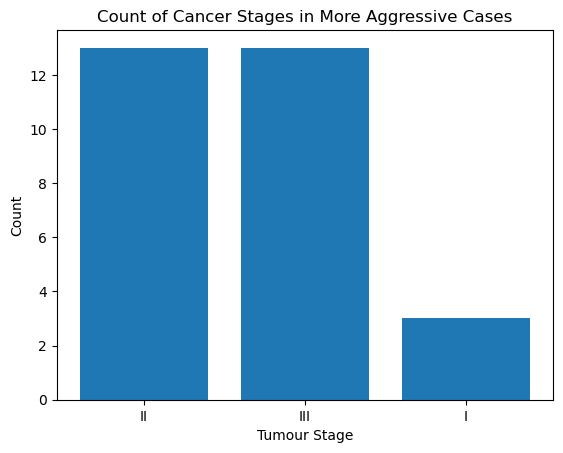

In [40]:
plt.bar(stage_counts.index, stage_counts.values)
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.title('Count of Cancer Stages in More Aggressive Cases')
plt.show()

We can see clearly that in more aggressive cases,more patients had developed stage III or Stage II Tumour rather than Stage I.


In [41]:
#Now for other cases
stage_counts = Other_cases['Tumour_Stage'].value_counts()
stage_counts

Tumour_Stage
II     167
III     64
I       57
Name: count, dtype: int64

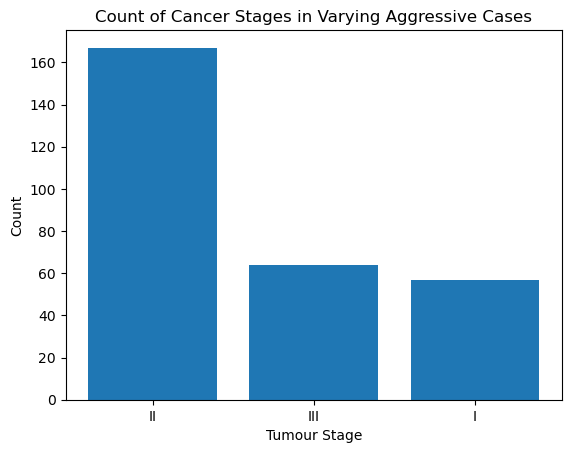

In [42]:
plt.bar(stage_counts.index, stage_counts.values)
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.title('Count of Cancer Stages in Varying Aggressive Cases')
plt.show()

We can clearly see for varying aggressiveness cases Stage II tumour growths are dominant.

Conclusions:

- Stage II is prevalent: In both aggressive and less aggressive cases, stage II is the most common tumor stage. This suggests that a majority of cases are diagnosed at this stage.
- Stage I is less common: While stage I is present in both groups, it's notably less frequent, particularly in more aggressive cases. This might indicate that early detection and diagnosis are challenging.
- Stage III is significant: Stage III is a common stage in both groups, but it's more prevalent in less aggressive cases. This could suggest that early interventions or treatments are more effective in preventing progression to later stages.

In [43]:
Histology_counts = More_aggressive['Histology'].value_counts()
Histology_counts

Histology
Infiltrating Ductal Carcinoma     21
Infiltrating Lobular Carcinoma     7
Mucinous Carcinoma                 1
Name: count, dtype: int64

In [45]:
Histology_counts_2 = Other_cases['Histology'].value_counts()
Histology_counts_2

Histology
Infiltrating Ductal Carcinoma     203
Infiltrating Lobular Carcinoma     74
Mucinous Carcinoma                 11
Name: count, dtype: int64

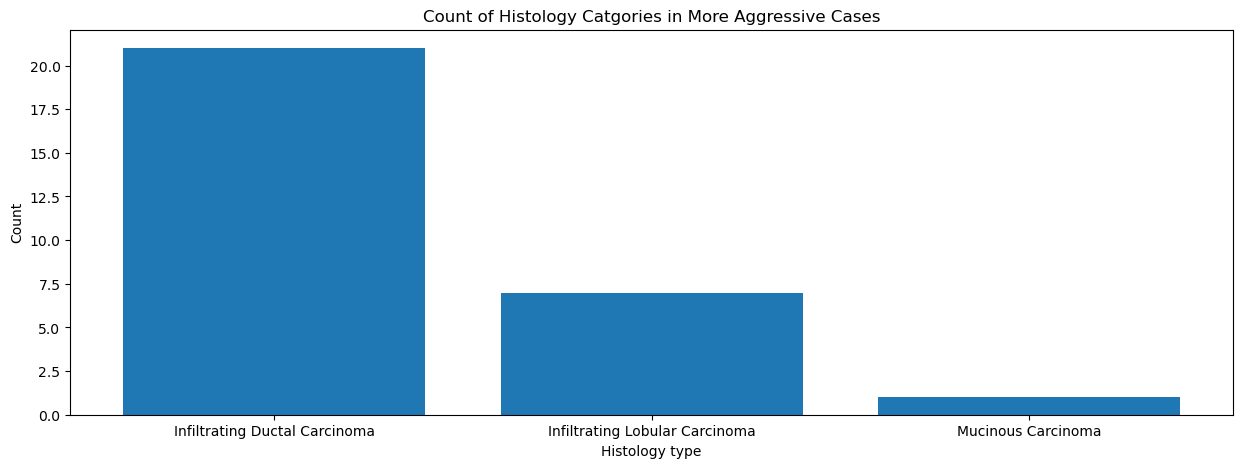

In [53]:
plt.figure(figsize=(15,5))
plt.bar(Histology_counts.index, Histology_counts.values)
plt.xlabel('Histology type')
plt.ylabel('Count')
plt.title('Count of Histology Catgories in More Aggressive Cases')
plt.show()

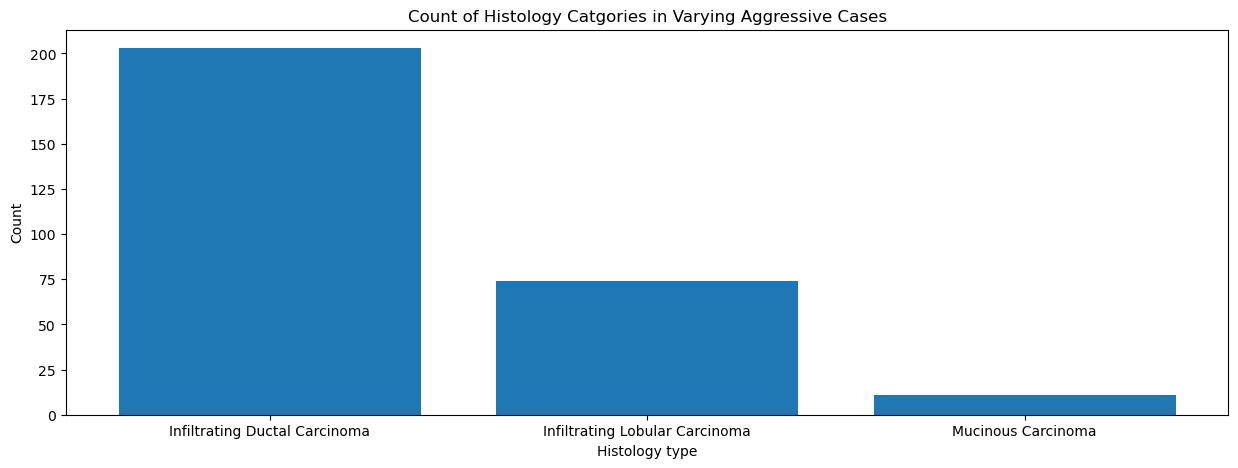

In [52]:
plt.figure(figsize=(15,5))
plt.bar(Histology_counts_2.index, Histology_counts_2.values)
plt.xlabel('Histology type')
plt.ylabel('Count')
plt.title('Count of Histology Catgories in Varying Aggressive Cases')
plt.show()

Observation:

- Infiltrating Ductal Carcinoma (IDC): This is the most common type in both aggressive and less aggressive cases.
- Infiltrating Lobular Carcinoma (ILC): While less common than IDC, ILC is still represented in both groups.
- Mucinous Carcinoma: This type is relatively rare in both groups.

Conclusions:

- IDC Predominance: The predominance of IDC in both aggressive and less aggressive cases suggests that it's a common histological type of breast cancer.
- ILC Representation: ILC is a less frequent type but is still present in a significant number of cases, indicating its importance in breast cancer diagnosis and treatment.
- Mucinous Carcinoma Infrequency: Mucinous carcinoma is a relatively rare type, suggesting that it may have different characteristics and prognosis compared to IDC and ILC.

## Objective 4

__Investigating Mortality Rates:__ Compare the mortality rates of the patients based on the Stage of Detection. Check which category hass higher chances of survival after surgery.


__Extracting a new variable called "Stage Detected"__  

In [77]:
def stage_detected (stage):
    if stage == 'I' or stage == 'II':
        return 'Early'
    else :
        return 'Late'
    
df["Stage Detected"] = df["Tumour_Stage"].apply(stage_detected)

In [78]:
df.head(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Aggressiveness,Stage Detected
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.547150,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive,Varying Aggressive,Late
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.614470,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead,Varying Aggressive,Early
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.327470,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive,Varying Aggressive,Late
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.193040,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive,Varying Aggressive,Early
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.520450,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead,Varying Aggressive,Early
5,TCGA-AO-A1KQ,84.0,MALE,-0.081872,1.72410,-0.057335,0.043025,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,18-Sep-17,15-Nov-21,Alive,Varying Aggressive,Late
6,TCGA-D8-A73X,53.0,FEMALE,-0.069535,1.41830,-0.361050,0.391580,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,04-Feb-17,07-Feb-18,Alive,Varying Aggressive,Early
8,TCGA-EW-A1P5,77.0,FEMALE,-0.151750,-0.66332,1.189400,0.217180,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,28-Sep-17,28-Sep-18,Alive,Varying Aggressive,Early
9,TCGA-A8-A09A,40.0,FEMALE,-0.565700,1.26680,-0.293460,0.193950,II,Infiltrating Lobular Carcinoma,Positive,Positive,Positive,Other,14-Feb-17,15-Dec-17,Alive,More Aggressive,Early
10,TCGA-S3-A6ZG,71.0,FEMALE,-0.223050,0.50594,-0.349430,-0.835300,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,26-May-17,19-Dec-17,Alive,Varying Aggressive,Early


In [79]:
early = df[df["Stage Detected"]=="Early"]

In [80]:
late = df[df["Stage Detected"]=="Late"]

In [81]:
mortality_early = early["Patient_Status"].value_counts()
mortality_early

Patient_Status
Alive    195
Dead      45
Name: count, dtype: int64

In [82]:
mortality_late = late["Patient_Status"].value_counts()
mortality_late

Patient_Status
Alive    60
Dead     17
Name: count, dtype: int64

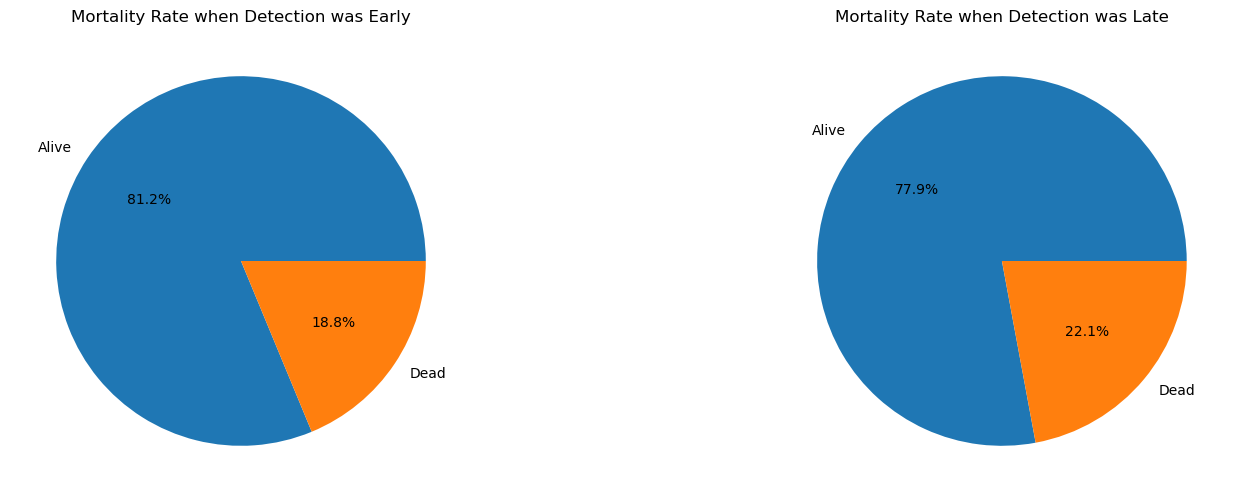

In [83]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.pie(mortality_early, labels=mortality_early.index, autopct="%1.1f%%")
plt.title("Mortality Rate when Detection was Early")
plt.subplot(1,2,2)
plt.pie(mortality_late, labels=mortality_early.index, autopct="%1.1f%%")
plt.title("Mortality Rate when Detection was Late")
plt.show()

__Conclusion:__
    
- Early Detection: A higher percentage of patients (81.2%) survived when breast cancer was detected early.
- Late Detection: A lower percentage of patients (77.9%) survived when breast cancer was detected late.
- However, it's important to consider potential limitations due to the sample size and detection rates.    

### Exporting the cleaned Data with more variables to a CSV:

In [88]:
cleaned_data = df
cleaned_data.to_csv('D:/Python Projects/Breast Cancer Data Dive (BCDD)/cleaned_BRCA.csv', index=False)

This Data will be further used for creating Dashboard using Tableau.

### Overall Conclusions

- Early Detection: Crucial for improving survival rates in breast cancer.
- Surgery Choice: Lumpectomy might be a more effective option compared to other surgeries.
- Tumor Stage: While stage II is common, early detection of stage I and effective management of stage III are crucial.
- Histology: IDC is the most common type, but ILC and mucinous carcinoma also play a role.